## Official Website -> [quick-ml](http://antoreepjana.wixsite.com/quick-ml)

## Summary -> <br>
In this notebook, we'll learn how to create Labeled TFRecords Dataset in multiple parts. This is a standard industry practice where the Dataset is regenerated in TFRecords in multiple parts rather than a single file. <br>
Multi-parts TFRecords Dataset is easier to manage as size per file gets reduced. <br>
<br>
**Note:-** For making of TFRecords Dataset, you don't need TPUs. This processing happens in the CPU.

### Installation

Install the latest version of quick_ml

In [1]:
!pip install -q quick-ml

### Imports

Make the necessary imports. <br>
Please maintain the order of the imports. Tensorflow followed by quick_ml. <br>
After a suceessful import, you'll receive an output stating successful import of Tensorflow & the version of Tensorflow imported.

In [2]:
import tensorflow as tf
import quick_ml

Tensorflow imported successfully. Tensorflow version -> 2.4.0


Get the necessary utility function to perform the labeled dataset creation in splits. <br>
create_split_tfrecords_data() supports this utility. Learn more [here](https://antoreepjana.wixsite.com/quick-ml/making-custom-datasets-tfrecords) at Labeled Data Part B.

In [3]:
from quick_ml.tfrecords_maker import create_split_tfrecords_data

### Gather the Dataset

We'll be using Cats & Dogs dataset and transforming it to TFRecords dataset in multi-parts.

In [4]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip -O catsdogs.zip
!unzip -q catsdogs.zip
!rm catsdogs.zip

--2021-03-02 14:50:36--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.36.68.33, 2600:1402:6800:283::e59, 2600:1402:6800:297::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.36.68.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘catsdogs.zip’

catsdogs.zip        100%[===================>] 786.68M   119MB/s    in 6.4s    

2021-03-02 14:50:43 (122 MB/s) - ‘catsdogs.zip’ saved [824894548/824894548]



### Create the TFRecords Dataset

With the right set of parameters needed by **create_split_tfrecords_data**, you can begin generating your TFRecords Dataset. <br> 
##### To know more about the parameters, please check [here](https://antoreepjana.wixsite.com/quick-ml/making-custom-datasets-tfrecords) at Labeled Data Part B.

In [5]:
data_dir = '/kaggle/working/PetImages'
outfile1name = 'train.tfrecords'
output1folder = 'train'
outfile2name = 'val.tfrecords'
output2folder = 'val'
split_size_ratio = 0.8

create_split_tfrecords_data(data_dir, outfile1name,output1folder,  outfile2name,output2folder,  split_size_ratio,num_parts1 = 10, num_parts2 = 5,  IMAGE_SIZE = (192,192))

Split ratio -> 0.8
Class Encodings for the Dataset Folder is as follows -> 

 {'Cat': 0, 'Dog': 1}

		Ensure that the data directory has the following structure ->

		/data|
			 |
			 |-> class1
			 |-> class2
			 |-> class3
			 |-> class4
			 .
			 .
			 .
			 |-> classN

		the input to data_dir must the path to /data folder. & Make sure that the images are in .jpg format
		
Beginning to write data to train.tfrecords


Data written -> 0/2000
Data written -> 100/2000
Data written -> 200/2000
Data written -> 300/2000
Data written -> 400/2000
Data written -> 500/2000
Data written -> 600/2000
Data written -> 700/2000
Data written -> 800/2000
Data written -> 900/2000
Data written -> 1000/2000
Data written -> 1100/2000
Data written -> 1200/2000
Data written -> 1300/2000
Data written -> 1400/2000
Data written -> 1500/2000
Data written -> 1600/2000
Data written -> 1700/2000
Data written -> 1800/2000
Data written -> 1900/2000
Done with writing data to train_part_1.tfrecords



				Your Labeled

##### Great! We have generated our TFRecords Dataset. <br>
After generating the TFRecords Dataset, we might want to visualize and check the TFRecords Dataset. quick_ml provides an easy solution to quickly check & visualize the TFRecords Dataset created using quick_ml

**check_batch_and_labels()** is used to visualize the TFRecords Dataset created using quick_ml. Learn more [here](https://antoreepjana.wixsite.com/quick-ml/visualize-check-data)

In [6]:
from quick_ml.visualize_and_check_data import check_batch_and_labels

As usual, to read & access TFRecords Dataset (labeled or unlabeled) in quick_ml, the Data Format needs to be defined first. <br>
The Dataset definition/format is provided either in the Dataset's description or in the output cell (if the dataset is just created). <br>
In our case, the latter is applicable. If you scroll up, the output of create_split_tfrecords_data() mentions the dictionary_labeled_format. <br>
#### Run the cell below to define the Labeled TFRecords Data Format.

In [7]:
dictionary_labeled = "{'image' : tf.io.FixedLenFeature([], tf.string),'label' : tf.io.FixedLenFeature([], tf.int64)}"
IMAGE_SIZE = "192,192"

from quick_ml.begin_tpu import get_labeled_tfrecord_format

get_labeled_tfrecord_format(dictionary_labeled, IMAGE_SIZE)

### Visualize the created tfrecords dataset

Visualize the **train_part_3.tfrecords**, **9** units, in a grid of **3**x**3**, figure size of **(15,15)**

In [8]:
check_batch_and_labels('/kaggle/working/train/train_part_3.tfrecords', 9, 3, 3, grid_size=(15, 15))

Visualize the **val_part_3.tfrecords**, **9** units, in a grid of **3**x**3**, figure size of **(15,15)**

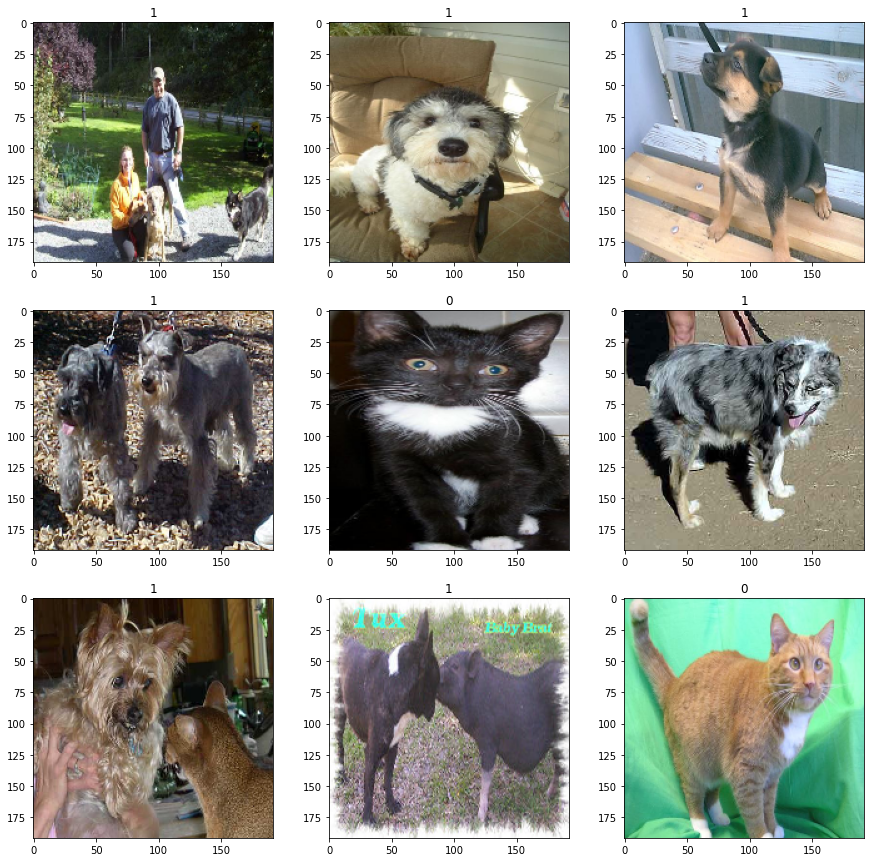

In [9]:
check_batch_and_labels('/kaggle/working/val/val_part_3.tfrecords', 9, 3, 3, grid_size=(15, 15))